In [16]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from keras.datasets import fashion_mnist
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import time

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train.reshape(x_train.shape[0],-1))
X_test_scaled = scaler.fit_transform(x_test.reshape(x_test.shape[0],-1))

In [3]:
X_train_subset = X_train_scaled[:2000]
y_train_subset = y_train[:2000]

nn_clf = MLPClassifier(hidden_layer_sizes=(128),
                    activation='relu',
                    solver='sgd',
                    alpha=0.001,
                    learning_rate_init=1e-3,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1)
nn_clf.fit(X_train_subset, y_train_subset.flatten())

MLPClassifier(alpha=0.001, hidden_layer_sizes=128, max_iter=1000,
              n_iter_no_change=25, random_state=1, solver='sgd')

/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't conv

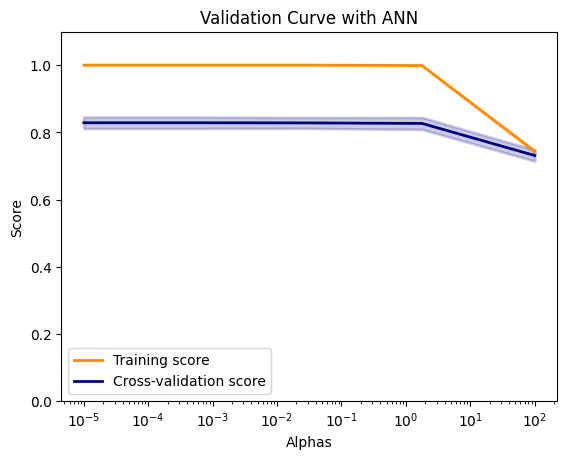

In [4]:
param_range = np.logspace(-5, 2, 5)

train_scores, test_scores = validation_curve(
    nn_clf, X_train_subset, y_train_subset, param_name="alpha", param_range=param_range, cv=5, n_jobs=-1)

# code modified from 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with ANN")
plt.xlabel("Alphas")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: overflow encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:152

/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: Convergen

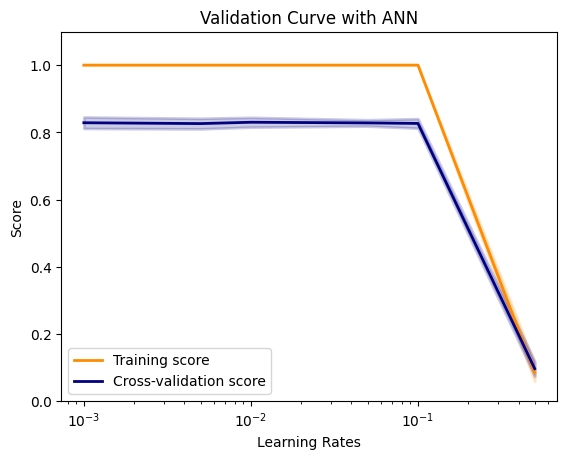

In [5]:
learning_rates = [0.001,0.005,0.01, 0.05, 0.1, 0.5, 1, 5, 10]

train_scores, test_scores = validation_curve(
    nn_clf, X_train_subset, y_train_subset, param_name="learning_rate_init", param_range=learning_rates, cv=5, n_jobs=-1)

# code modified from 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with ANN")
plt.xlabel("Learning Rates")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    learning_rates, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    learning_rates,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    learning_rates, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    learning_rates,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()



Training accuracy:  1.0
Testing accuracy:  0.8177


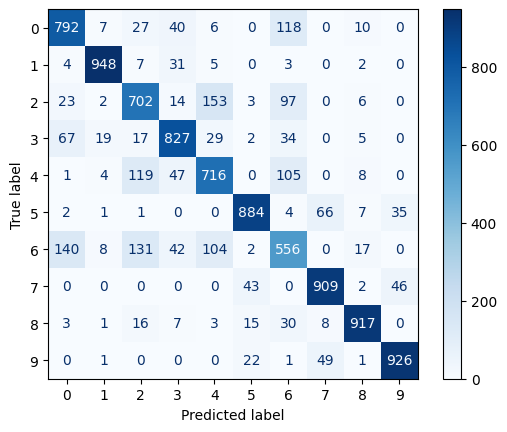

In [6]:
#lab code
print('Training accuracy: ', round(nn_clf.score(X_train_subset, y_train_subset.flatten()),4))
print('Testing accuracy: ', round(nn_clf.score(X_test_scaled, y_test.flatten()),4))

plot_confusion_matrix(nn_clf, X_test_scaled, y_test.flatten(), cmap="Blues")

Text(0, 0.5, 'Loss')

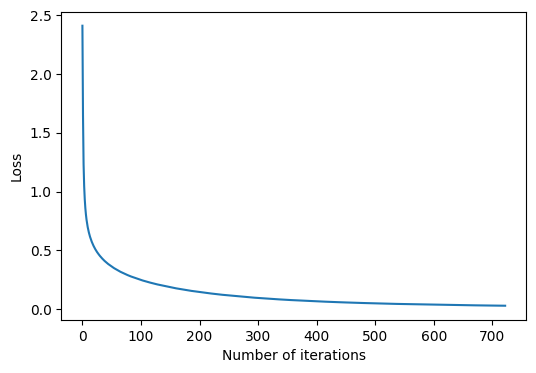

In [7]:
#lab code
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nn_clf.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')

In [34]:
alphas = np.logspace(-4, 0, 100)
learning_rates = np.logspace(-3, 0, 100)

In [35]:
parameters = {'learning_rate_init':learning_rates, 'alpha':alphas}

clf = RandomizedSearchCV(nn_clf, parameters, scoring='accuracy', n_iter=10, cv=5, n_jobs=-1, verbose=3)
clf.fit(X_train_subset, y_train_subset.flatten())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=MLPClassifier(alpha=0.001, hidden_layer_sizes=128,
                                           max_iter=1000, n_iter_no_change=25,
                                           random_state=1, solver='sgd'),
                   n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.535364...
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ])},
                   scoring='accuracy', verbose=3)

{'learning_rate_init': 0.06579332246575682, 'alpha': 0.10722672220103242}
Training accuracy:  1.0
Testing accuracy:  0.8234


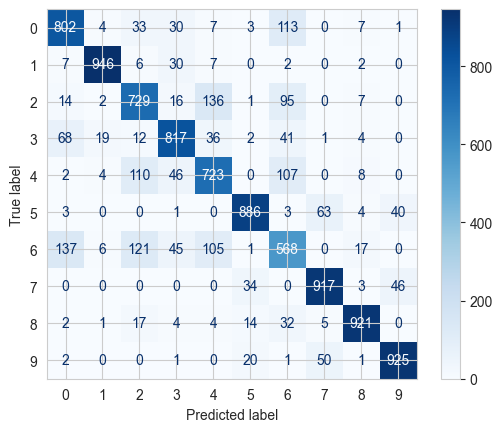

In [36]:
print(clf.best_params_)
print('Training accuracy: ', round(clf.score(X_train_subset, y_train_subset.flatten()),4))
print('Testing accuracy: ', round(clf.score(X_test_scaled, y_test.flatten()),4))
plot_confusion_matrix(clf, X_test_scaled, y_test.flatten(), cmap="Blues")

In [40]:
start = time.time()

parameters = {'learning_rate_init':learning_rates, 'alpha':alphas}

clf = RandomizedSearchCV(nn_clf, parameters, scoring='accuracy', n_iter=30, cv=5, n_jobs=-1, verbose=3)
clf.fit(X_train_subset, y_train_subset.flatten())

end = time.time()
print(end - start)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: overflow encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: overflow encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/nafaal/Projects/ml_cw_new/venv/lib/python3.10/site-packages/sklearn/neural_network/_base.py:6

596.7656769752502


{'learning_rate_init': 0.12328467394420659, 'alpha': 0.10722672220103242}
Training accuracy:  1.0
Testing accuracy:  0.8228


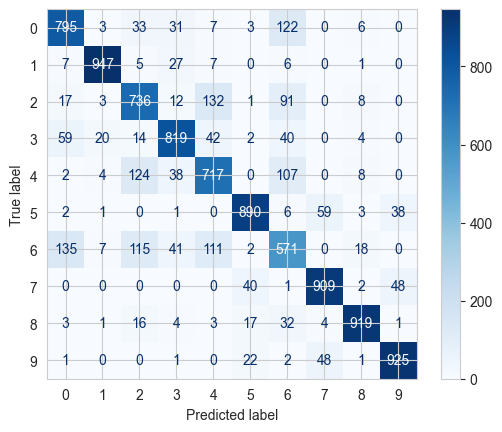

In [41]:
print(clf.best_params_)
print('Training accuracy: ', round(clf.score(X_train_subset, y_train_subset.flatten()),4))
print('Testing accuracy: ', round(clf.score(X_test_scaled, y_test.flatten()),4))
plot_confusion_matrix(clf, X_test_scaled, y_test.flatten(), cmap="Blues")

In [42]:
df = pd.DataFrame(clf.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate_init,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.972501,0.023788,0.010801,0.000466,0.351119,0.000933,"{'learning_rate_init': 0.3511191734215131, 'al...",0.205,0.1100,0.3000,0.1425,0.1600,0.1835,0.065833,26
1,64.690936,2.377254,0.014164,0.002937,0.024771,0.170735,"{'learning_rate_init': 0.024770763559917114, '...",0.830,0.8475,0.8175,0.8200,0.8375,0.8305,0.011113,6
2,14.287880,0.328457,0.014068,0.002209,0.04037,0.000933,"{'learning_rate_init': 0.04037017258596556, 'a...",0.830,0.8475,0.8125,0.8225,0.8375,0.8300,0.012042,7
3,32.044805,1.564482,0.011225,0.001824,0.007565,0.00012,"{'learning_rate_init': 0.007564633275546291, '...",0.840,0.8475,0.8175,0.8100,0.8325,0.8295,0.013910,8
4,83.082863,2.264081,0.013303,0.002073,0.001322,0.050941,"{'learning_rate_init': 0.0013219411484660286, ...",0.840,0.8475,0.8125,0.8050,0.8300,0.8270,0.016078,16


[CV 2/5] END alpha=0.1707352647470692, learning_rate_init=0.4641588833612782;, score=0.095 total time=   4.2s
[CV 3/5] END alpha=0.0509413801481638, learning_rate_init=0.0021544346900318843;, score=0.812 total time= 1.1min
[CV 5/5] END alpha=0.024201282647943835, learning_rate_init=0.0016297508346206436;, score=0.835 total time= 1.1min
[CV 2/5] END alpha=0.06734150657750829, learning_rate_init=0.013219411484660293;, score=0.845 total time=  24.4s
[CV 3/5] END alpha=0.00015922827933410923, learning_rate_init=0.06579332246575682;, score=0.820 total time=  10.9s
[CV 2/5] END alpha=0.00025353644939701115, learning_rate_init=0.023101297000831605;, score=0.845 total time=  16.7s
[CV 3/5] END alpha=0.001788649529057435, learning_rate_init=0.01747528400007684;, score=0.807 total time=  20.6s
[CV 1/5] END alpha=0.0054622772176843425, learning_rate_init=0.0014174741629268048;, score=0.840 total time= 1.9min
[CV 2/5] END alpha=0.007924828983539177, learning_rate_init=0.0016297508346206436;, score

[CV 3/5] END alpha=0.061359072734131756, learning_rate_init=0.0021544346900318843;, score=0.812 total time= 1.1min
[CV 3/5] END alpha=0.024201282647943835, learning_rate_init=0.0016297508346206436;, score=0.812 total time= 1.2min
[CV 1/5] END alpha=0.06734150657750829, learning_rate_init=0.013219411484660293;, score=0.843 total time=  26.5s
[CV 4/5] END alpha=0.00015922827933410923, learning_rate_init=0.06579332246575682;, score=0.815 total time=  11.4s
[CV 1/5] END alpha=0.026560877829466867, learning_rate_init=0.0037649358067924675;, score=0.840 total time=  53.4s
[CV 5/5] END alpha=0.0054622772176843425, learning_rate_init=0.0014174741629268048;, score=0.835 total time= 2.1min
[CV 5/5] END alpha=0.022051307399030457, learning_rate_init=0.021544346900318846;, score=0.833 total time=  21.5s
[CV 3/5] END alpha=0.03199267137797385, learning_rate_init=0.1747528400007685;, score=0.818 total time= 2.3min
[CV 2/5] END alpha=0.0009326033468832199, learning_rate_init=0.04037017258596556;, sco

[CV 2/5] END alpha=0.0509413801481638, learning_rate_init=0.0021544346900318843;, score=0.845 total time= 1.2min
[CV 2/5] END alpha=0.024201282647943835, learning_rate_init=0.046415888336127795;, score=0.850 total time=  14.6s
[CV 4/5] END alpha=0.10722672220103242, learning_rate_init=0.06579332246575682;, score=0.820 total time=  45.4s
[CV 2/5] END alpha=0.4750810162102798, learning_rate_init=0.6135907273413176;, score=0.190 total time=   3.8s
[CV 4/5] END alpha=0.06734150657750829, learning_rate_init=0.013219411484660293;, score=0.805 total time=  24.7s
[CV 2/5] END alpha=0.3274549162877732, learning_rate_init=0.40370172585965536;, score=0.113 total time=   4.0s
[CV 4/5] END alpha=0.3274549162877732, learning_rate_init=0.40370172585965536;, score=0.100 total time=   3.7s
[CV 4/5] END alpha=0.00025353644939701115, learning_rate_init=0.023101297000831605;, score=0.810 total time=  16.2s
[CV 1/5] END alpha=0.0013530477745798076, learning_rate_init=0.32745491628777285;, score=0.182 total

[CV 1/5] END alpha=0.0509413801481638, learning_rate_init=0.0021544346900318843;, score=0.835 total time= 1.2min
[CV 1/5] END alpha=0.10722672220103242, learning_rate_init=0.06579332246575682;, score=0.843 total time=  43.4s
[CV 5/5] END alpha=0.016681005372000592, learning_rate_init=0.02848035868435802;, score=0.848 total time=  15.2s
[CV 5/5] END alpha=0.4750810162102798, learning_rate_init=0.6135907273413176;, score=0.007 total time=   3.8s
[CV 2/5] END alpha=0.0005336699231206312, learning_rate_init=0.6579332246575682;, score=0.022 total time=   3.8s
[CV 3/5] END alpha=0.0005336699231206312, learning_rate_init=0.6579332246575682;, score=0.087 total time=   3.8s
[CV 1/5] END alpha=0.0005336699231206312, learning_rate_init=0.5336699231206312;, score=0.090 total time=   3.7s
[CV 3/5] END alpha=0.0005336699231206312, learning_rate_init=0.5336699231206312;, score=0.098 total time=   3.7s
[CV 4/5] END alpha=0.0005336699231206312, learning_rate_init=0.5336699231206312;, score=0.100 total 

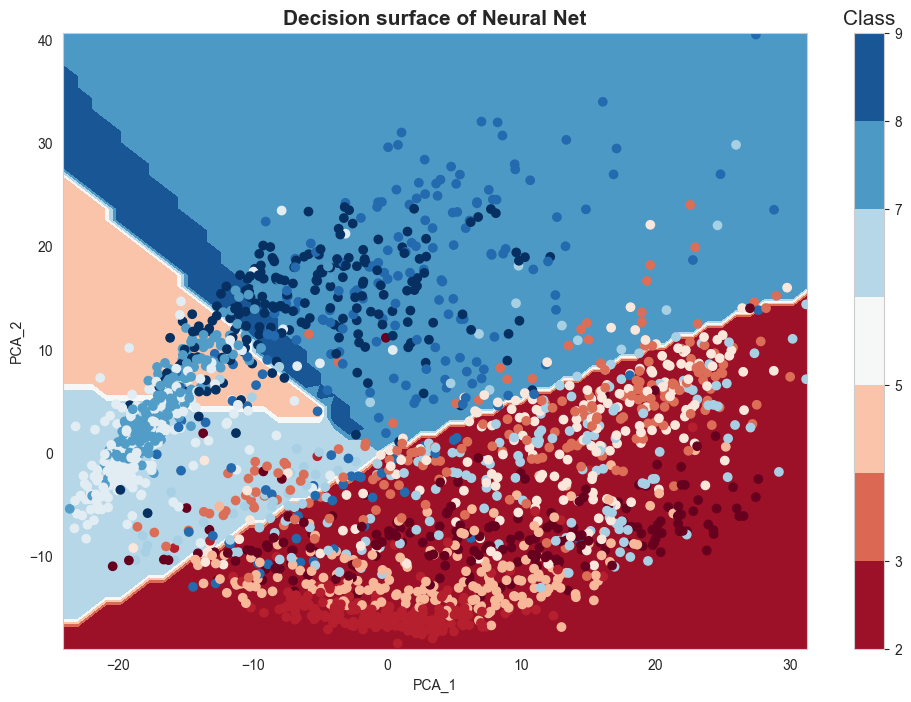

In [57]:
# Decision boundaries

# Dimension reduction for plotting
sklearn_pca = PCA(n_components=2)
X_pca = sklearn_pca.fit_transform(X_train_scaled)
pca_comps = sklearn_pca.components_

std_x = np.std(X_pca[0])
std_y = np.std(X_pca[0])

# create meshgrid - labcode
x_min, x_max = X_pca[:, 0].min() - .5, X_pca[:, 0].max() + .5
y_min, y_max = X_pca[:, 1].min() - .5, X_pca[:, 1].max() + .5
x_step = std_x/10
y_step = std_y/10

xx, yy = np.meshgrid(np.arange(x_min, x_max, x_step), np.arange(y_min, y_max, y_step))

# Projected points into PC plane
z = np.c_[xx.ravel(), yy.ravel()]

# Revert projection
x = np.dot(z,pca_comps)

predictions = nn_clf.predict(x)
predictions = predictions.reshape(xx.shape)

# Plot decision boundaries
sns.set_style("whitegrid")
plt.figure(figsize = (12,8))
contour = plt.contourf(xx, yy, predictions, cmap=plt.cm.RdBu)
clb = plt.colorbar(contour, boundaries=list(np.unique(predictions)),ticks=list(np.unique(predictions)),spacing='proportional')
clb.ax.set_title('Class', fontsize=15)
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title("Decision surface of Neural Net", fontweight = 'bold', fontsize=15)

X_pca_small = X_pca[:2000]
y_pca_small = y_train[:2000]
plt.scatter(X_pca[:, 0], X_pca_small[:, 1], c=y_train_subset, cmap=plt.cm.RdBu)


In [58]:
sklearn_pca.components_

array([[ 5.80798754e-19,  2.21207046e-03,  1.25571992e-03, ...,
         4.15085483e-03, -7.92994243e-04, -4.43798777e-04],
       [ 1.01523946e-16,  5.67873478e-04,  4.14330951e-03, ...,
         1.23459017e-02,  5.47359397e-03,  1.61839841e-03]])